# Predicting House Prices

The features we have-

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude

We shall use Tensorflow

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

print('Libraries imported.')

Libraries imported.


In [2]:
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

Using TensorFlow backend.


In [3]:
#setting the column names

column_names=['serial', #the serial number
 'date',                #year of sale of house
 'age',                 #age of house at time of sale
 'distance',            #distance of house from city center (in KM)
 'stores',              #number of stores in the locality
 'latitude',            #latitude
 'longitude',           #longitude
 'price']               #price of house

In [4]:
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


# Data Normalization

In [5]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


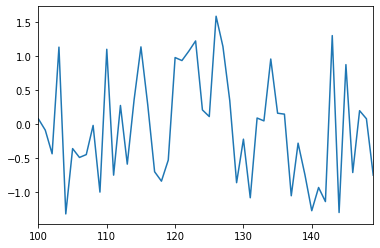

In [6]:
#we can see that the data has been normalized within 1.5 and -1.5

df_norm["price"][100:150].plot()

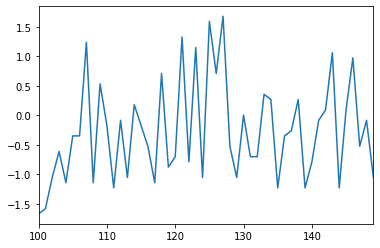

In [7]:
df_norm["age"][100:150].plot()

In [8]:
#converting back the normalized price to real value of price

y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

In [9]:
#testing the function

print(convert_label_value(0.350088))

14263


# Creating Training and Testing sets

In [10]:
#The input features

X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [11]:
#The labels

y = df_norm.iloc[:, -1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [12]:
#Feature and label values

X_arr = X.values
y_arr = y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


In [13]:
X_arr[0:5]

array([[ 0.01597778,  0.18138426,  1.25700164,  0.34522379, -0.30721158,
        -1.26079862],
       [-0.35048517, -1.31911814, -0.93060999, -0.60931203,  0.32530146,
        -1.26079862],
       [ 1.29859812, -0.08341028, -0.61809404,  0.66340239,  1.59032754,
        -1.57645598],
       [-1.26664255, -0.52473452, -0.93060999, -0.92749063, -1.57223766,
         0.94880289],
       [ 0.93213517,  0.53444365,  0.00693785,  0.981581  , -1.25598114,
        -0.94514126]])

In [14]:
y_arr[0:5]

array([ 0.35008836, -1.83648583, -0.33958379, -1.83942478,  0.24526603])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.1, shuffle = True, random_state=7)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4500, 6)
y_train shape:  (4500,)
X_test shape:  (500, 6)
y_test shape:  (500,)


# Create the model

In [16]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## Using the untrained model to get sample predictions

In [17]:
model = get_model()

preds_on_untrained = model.predict(X_test)

## Training the model using Train data

In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)


history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 400,
    callbacks = [early_stopping]
)

Train on 4500 samples, validate on 500 samples
Epoch 1/400
4500/4500 [==============================] - 1s 202us/sample - loss: 1.1588 - val_loss: 1.1653
Epoch 2/400
4500/4500 [==============================] - 0s 80us/sample - loss: 1.1514 - val_loss: 1.1572
Epoch 3/400
4500/4500 [==============================] - 0s 65us/sample - loss: 1.1438 - val_loss: 1.1488
Epoch 4/400
4500/4500 [==============================] - 0s 66us/sample - loss: 1.1359 - val_loss: 1.1402
Epoch 5/400
4500/4500 [==============================] - 0s 69us/sample - loss: 1.1279 - val_loss: 1.1316
Epoch 6/400
4500/4500 [==============================] - 0s 68us/sample - loss: 1.1198 - val_loss: 1.1229
Epoch 7/400
4500/4500 [==============================] - 0s 68us/sample - loss: 1.1117 - val_loss: 1.1141
Epoch 8/400
4500/4500 [==============================] - 0s 67us/sample - loss: 1.1036 - val_loss: 1.1053
Epoch 9/400
4500/4500 [==============================] - 0s 66us/sample - loss: 1.0955 - val_loss: 1.096

4500/4500 [==============================] - 0s 66us/sample - loss: 0.7287 - val_loss: 0.7010
Epoch 78/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.7255 - val_loss: 0.6976
Epoch 79/400
4500/4500 [==============================] - 0s 67us/sample - loss: 0.7224 - val_loss: 0.6942
Epoch 80/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.7193 - val_loss: 0.6908
Epoch 81/400
4500/4500 [==============================] - 0s 77us/sample - loss: 0.7163 - val_loss: 0.6874
Epoch 82/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.7132 - val_loss: 0.6841
Epoch 83/400
4500/4500 [==============================] - 0s 69us/sample - loss: 0.7103 - val_loss: 0.6810
Epoch 84/400
4500/4500 [==============================] - 0s 69us/sample - loss: 0.7074 - val_loss: 0.6778
Epoch 85/400
4500/4500 [==============================] - 0s 76us/sample - loss: 0.7046 - val_loss: 0.6747
Epoch 86/400
4500/4500 [==========================

Epoch 153/400
4500/4500 [==============================] - 0s 70us/sample - loss: 0.5699 - val_loss: 0.5278
Epoch 154/400
4500/4500 [==============================] - 0s 80us/sample - loss: 0.5685 - val_loss: 0.5263
Epoch 155/400
4500/4500 [==============================] - 0s 80us/sample - loss: 0.5671 - val_loss: 0.5249
Epoch 156/400
4500/4500 [==============================] - 0s 73us/sample - loss: 0.5657 - val_loss: 0.5234
Epoch 157/400
4500/4500 [==============================] - 0s 80us/sample - loss: 0.5643 - val_loss: 0.5220
Epoch 158/400
4500/4500 [==============================] - 0s 72us/sample - loss: 0.5630 - val_loss: 0.5206
Epoch 159/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.5616 - val_loss: 0.5192
Epoch 160/400
4500/4500 [==============================] - 0s 70us/sample - loss: 0.5603 - val_loss: 0.5178
Epoch 161/400
4500/4500 [==============================] - 0s 71us/sample - loss: 0.5590 - val_loss: 0.5165
Epoch 162/400
4500/4500 [===

Epoch 229/400
4500/4500 [==============================] - 0s 70us/sample - loss: 0.4842 - val_loss: 0.4428
Epoch 230/400
4500/4500 [==============================] - 0s 69us/sample - loss: 0.4833 - val_loss: 0.4419
Epoch 231/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.4824 - val_loss: 0.4410
Epoch 232/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.4815 - val_loss: 0.4401
Epoch 233/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.4805 - val_loss: 0.4393
Epoch 234/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.4796 - val_loss: 0.4384
Epoch 235/400
4500/4500 [==============================] - 0s 70us/sample - loss: 0.4787 - val_loss: 0.4376
Epoch 236/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.4778 - val_loss: 0.4367
Epoch 237/400
4500/4500 [==============================] - 0s 68us/sample - loss: 0.4769 - val_loss: 0.4358
Epoch 238/400
4500/4500 [===

Epoch 305/400
4500/4500 [==============================] - 0s 78us/sample - loss: 0.4222 - val_loss: 0.3857
Epoch 306/400
4500/4500 [==============================] - 0s 78us/sample - loss: 0.4215 - val_loss: 0.3851
Epoch 307/400
4500/4500 [==============================] - 0s 73us/sample - loss: 0.4208 - val_loss: 0.3845
Epoch 308/400
4500/4500 [==============================] - 0s 71us/sample - loss: 0.4201 - val_loss: 0.3838
Epoch 309/400
4500/4500 [==============================] - 0s 78us/sample - loss: 0.4194 - val_loss: 0.3832
Epoch 310/400
4500/4500 [==============================] - 0s 72us/sample - loss: 0.4187 - val_loss: 0.3826
Epoch 311/400
4500/4500 [==============================] - 0s 71us/sample - loss: 0.4180 - val_loss: 0.3819
Epoch 312/400
4500/4500 [==============================] - 0s 73us/sample - loss: 0.4173 - val_loss: 0.3813
Epoch 313/400
4500/4500 [==============================] - 0s 80us/sample - loss: 0.4166 - val_loss: 0.3807
Epoch 314/400
4500/4500 [===

Epoch 381/400
4500/4500 [==============================] - 0s 75us/sample - loss: 0.3751 - val_loss: 0.3446
Epoch 382/400
4500/4500 [==============================] - 0s 80us/sample - loss: 0.3745 - val_loss: 0.3442
Epoch 383/400
4500/4500 [==============================] - 0s 79us/sample - loss: 0.3740 - val_loss: 0.3437
Epoch 384/400
4500/4500 [==============================] - 0s 78us/sample - loss: 0.3735 - val_loss: 0.3433
Epoch 385/400
4500/4500 [==============================] - 0s 78us/sample - loss: 0.3729 - val_loss: 0.3428
Epoch 386/400
4500/4500 [==============================] - 0s 78us/sample - loss: 0.3724 - val_loss: 0.3424
Epoch 387/400
4500/4500 [==============================] - 0s 78us/sample - loss: 0.3719 - val_loss: 0.3419
Epoch 388/400
4500/4500 [==============================] - ETA: 0s - loss: 0.372 - 0s 74us/sample - loss: 0.3714 - val_loss: 0.3415
Epoch 389/400
4500/4500 [==============================] - 0s 78us/sample - loss: 0.3708 - val_loss: 0.3410
Epoc

## Training and Validation loss

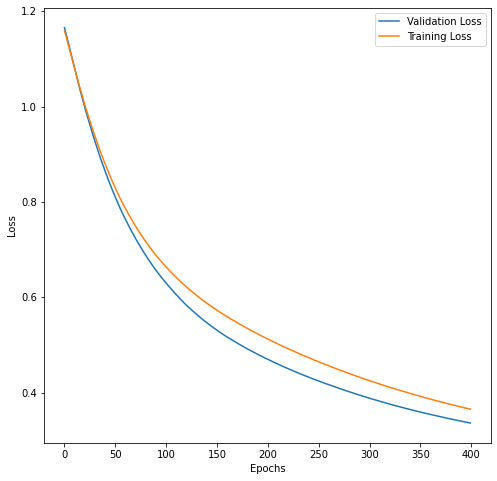

In [19]:
plot_loss(history)

# Comparasion between Predictions of Trained and Untrained model

# 1. Normalized data

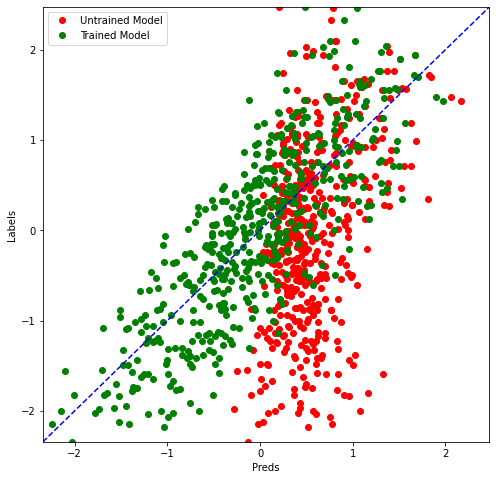

In [20]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

# 2. Actual price data

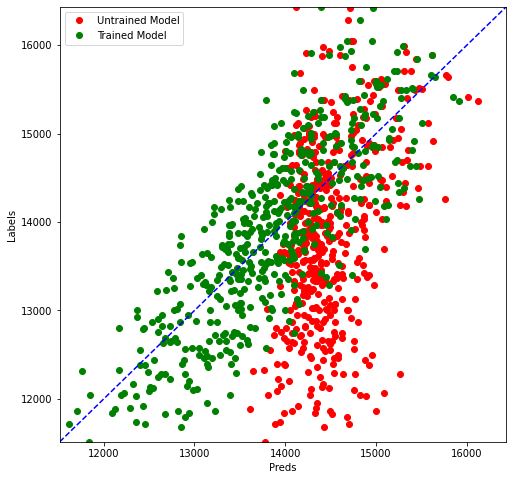

In [21]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)

In [22]:
#saving the model

model.save('My_Model')

In the next step we will load the model and check how to predict a single value.

Thank You.